# How to use the framework


In case that FrImCla is not installed in your system, the first task consist in installing using pip.

In [0]:
!pip install frimcla

To begin, we have to import all the classes that we will need to be able to use our framework.

In [0]:
import warnings
import time
import argparse
from frimcla.utils.conf import Conf
from imutils import paths
from __future__ import print_function
from frimcla.index_features import generateFeatures
from frimcla.StatisticalComparison import statisticalComparison
from frimcla.train import train
from frimcla.prediction import prediction
warnings.simplefilter(action="ignore", category=FutureWarning)

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

/usr/local/lib/python2.7/dist-packages/scikit_learn-0.19.1-py2.7-linux-x86_64.egg/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


### Configuring the dataset path

First of all we have to know the path which we have our dataset. The dataset must have a folder for each class that we want to predict. 

In [0]:
!wget "https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download&authuser=0" -O mias.zip
!unzip mias.zip

datasetPath = "./Mias"

### Feature Extractor

In this step we decide the feature extractor models that we are going to use with our dataset. These models will extract the most important points of the images. Then we save the points and with the classifier models that we will choose after this, we will classify the images with the classes of the dataset. Each feature extractor model has a different way to collect the most important points and for this reason we have to compare the models, because there is not a model that always fits better with the datasets.

In [0]:
featureExtractors = [["vgg19", "False"], ["hog"]]

Now that we have the feature extractor models we can execute the algorithm that collect the features of the dataset for each model. The only thing that we have to do is indicate the paths of the dataset and the output and the models that we want to use for the study. The verbose parameter is to indicate whether we want to appear information about the execution on console.

In [0]:
generateFeatures("./", 32, datasetPath, featureExtractors, False)

This algorithm will create a set of files that contains the features of the images. Each file corresponds to a model of those indicated above. 

### Classification models

Once we have stored the features of the images, we have to choose the clasiffication models that we are going to use for the dataset. All these classifiers will be used for each feature extractor model to know which is the performance of every combination.

In [0]:
modelClassifiers = [ "MLP","SVM","KNN", "LogisticRegression", "GradientBoost", "RandomForest"]

With the classifiers chosen, now that we have to do is to carry out a statistical analysis. The analysis studies and compares every combination. Once the analysis has compared all the combinations gives us the best combination of feature extractor model and classifier model and all the combinations that have not significant differencies with the best result.  

### Performance measures

We have to select a performance measure to know which is the best model. In this case, there are five different measures (accuracy, recall, precision, auroc and f1). The user have to select only one of the five measures. Accuracy is the default measure.

In [0]:
measure = "accuracy"

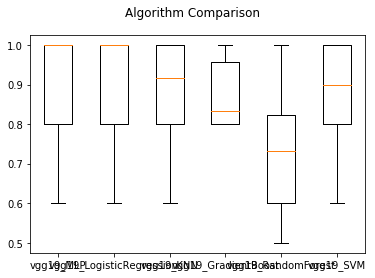

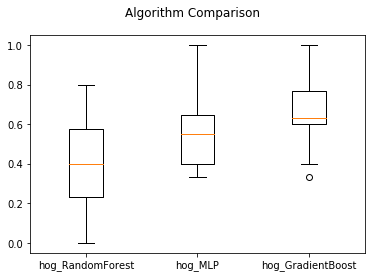

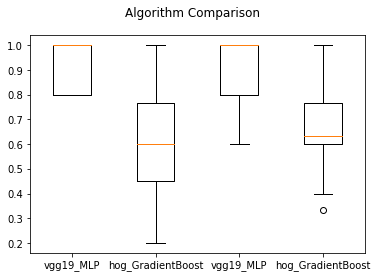

In [0]:
statisticalComparison("./", datasetPath, featureExtractors, modelClassifiers, measure, 10, False)

### Training the best model

Finally, we have to train the resulting combination. In this step, we only train the best model with all the images of the datset. In this case we do not split the dataset in test and train data, we need all the images to train and improve the results of the model. 

In this function FrImCla asks the user if he/she wants a web application or not (Y if the user wants the webapp). This web application uses the best model selected by FrImCla for this problem. The application generated is very simple and only contains a text box and a button to predict the class of new images. FrImCla generates a zip file that must be decompressed to be used. Inside the folder the user has to open a new terminal in this path and run the following command:

`python3 FlaskApp/app.py`

The comand executes the web application in http://localhost:5000/ To use the application the user has to write open the link in his/her browser.



In [0]:
train("./", datasetPath, 1)

y


Once we have the model trained, we can predict the class of the new images.


If you want to download the web application you have to execute the following code.

In [0]:
from google.colab import files
files.download('./output/Mias/web.zip') 

### Prediction

Now, with the best model trained we can predict the classes of our images. For this task, we have developed another algorithm to use the model. This execution will give us the predicted class of the image that we choose. 

If the combination of feature extractor and machine learning algorithm is not the best, FrImCla ask the user in the command window if he wants to continue with this combination. To continue with the prediction he has to tell Y (yes).

In [0]:
image = "/home/magarcd/Escritorio/dataset/PetImagesTest/1.jpg"
featureExtractor = ["vgg19", "False"]
classifier = "MLP"

# prediction(image, "./", datasetPath, featureExtractor, classifier)
prediction(featureExtractor, classifier, image, ".", datasetPath)